In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets_data_path = "c:/dellbackup/all things data science/datasets/twitter_data_bands.txt"

In [3]:
tweets_data = []

In [4]:
tweets_file = open(tweets_data_path,"r")

In [5]:
#reading the data into array 
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [6]:
print len(tweets_data)

2485


In [7]:
#creating an empty dataframe 
tweets = pd.DataFrame()

In [8]:
tweets["text"] = map(lambda tweet:tweet["text"],tweets_data)
tweets["lang"] = map(lambda tweet:tweet["lang"],tweets_data)
tweets["country"] = map(lambda tweet:tweet["place"]["country"] if tweet["place"] != None else None,tweets_data)

In [9]:
#first chart - top 5 languages the tweets are in
tweets_by_lang = tweets["lang"].value_counts()

In [10]:
tweets_by_lang

en     1803
es      211
pt      122
ja       68
und      67
fr       57
in       38
it       35
tr       20
th       10
de        8
nl        7
tl        7
ko        5
et        4
no        3
eu        3
lt        2
sv        2
hu        2
cs        2
da        2
pl        2
ht        1
ru        1
hi        1
ro        1
kn        1
Name: lang, dtype: int64

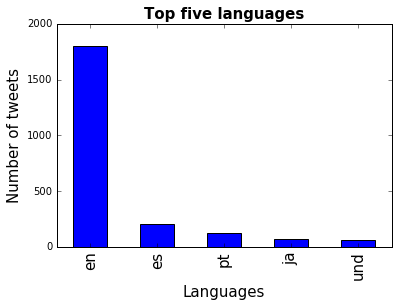

In [17]:
fig,ax = plt.subplots()
ax.tick_params(axis = "x", labelsize = 15)
ax.tick_params(axis = "y", labelsize = 10)
ax.set_xlabel("Languages", fontsize = 15)
ax.set_ylabel("Number of tweets", fontsize = 15)
ax.set_title("Top five languages", fontsize = 15, fontweight = "bold")
tweets_by_lang[:5].plot(ax = ax, kind = "bar", color = "blue")

In [14]:
#second chart - country wise the top five countries the tweets are in
tweets_by_country = tweets["country"].value_counts()

In [15]:
tweets_by_country

United States                  13
Brasil                          8
India                           4
Brazil                          3
Canada                          2
Argentina                       2
Italia                          2
France                          2
Colombia                        1
Republic of the Philippines     1
Suisse                          1
Estados Unidos                  1
Malaysia                        1
Sudan                           1
South Africa                    1
Türkiye                         1
Venezuela                       1
The Netherlands                 1
Indonesia                       1
Portugal                        1
Kingdom of Saudi Arabia         1
Name: country, dtype: int64

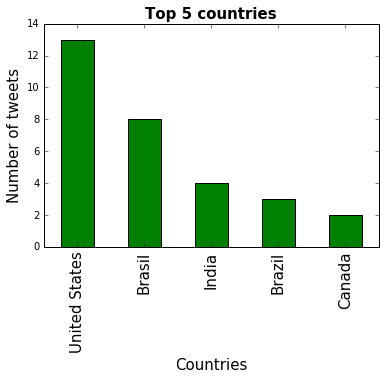

In [16]:
fig,ax = plt.subplots()
ax.tick_params(axis = "x", labelsize = 15)
ax.tick_params(axis = "y", labelsize = 10)
ax.set_xlabel("Countries", fontsize = 15)
ax.set_ylabel("Number of tweets", fontsize = 15)
ax.set_title("Top 5 countries", fontsize = 15, fontweight = "bold")
tweets_by_country[:5].plot(ax= ax, kind = "bar", color = "green")

In [18]:
#mining for the keywords using regular expressions
import re

In [19]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word,text)
    if match:
        return True
    return False

In [20]:
#adding 3 more columns to tweets dataframe
tweets["coldplay"] = tweets["text"].apply(lambda tweet:word_in_text("coldplay",tweet))

In [21]:
tweets["beatles"] = tweets["text"].apply(lambda tweet:word_in_text("beatles", tweet))

In [22]:
tweets["u2"] = tweets["text"].apply(lambda tweet:word_in_text("u2",tweet))

In [23]:
#calculating the number of tweets for each band
print tweets["coldplay"].value_counts()[True]

955


In [24]:
print tweets["beatles"].value_counts()[True]

1040


In [25]:
print tweets["u2"].value_counts()[True]

348


In [26]:
#making comparison chart
bands = ["coldplay","beatles","u2"]
tweets_by_bands = [tweets["coldplay"].value_counts()[True],tweets["beatles"].value_counts()[True],tweets["u2"].value_counts()[True]]


In [27]:
x_pos = list(range(len(bands)))

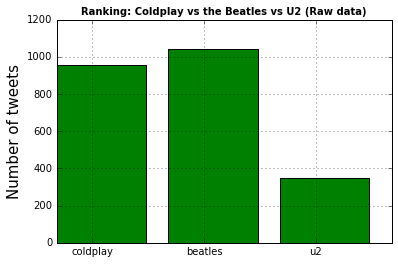

In [30]:
width = 0.8
fig,ax = plt.subplots()
plt.bar(x_pos, tweets_by_bands,width,alpha = 1, color = "g")
ax.set_ylabel("Number of tweets", fontsize = 15)
ax.set_title("Ranking: Coldplay vs the Beatles vs U2 (Raw data)",fontsize = 10, fontweight = "bold")
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(bands)
plt.grid()